In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../data/table.csv', parse_dates=['STD_YMD'])

In [3]:
df.head()

,STD_YMD,GU_NM,HDONG_NM,AG_20_F,AG_30_F,AG_40_F,AG_50_F,AG_60_F,AG_20_M,AG_30_M,...,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY,S_PT_CNT,D_PT_CNT,USE_AMT
0,2019-02-01,대구 수성구,고산1동,0.094684,0.066612,0.117062,0.099566,0.070804,0.104180,0.085641,...,0.093093,0.012012,0.108108,0.003003,0.195195,0.045045,0.153153,0,0,411993
1,2019-02-01,대구 수성구,고산2동,0.077246,0.067818,0.099493,0.087825,0.068341,0.096442,0.106579,...,0.081818,0.004545,0.059091,0.000000,0.168182,0.100000,0.154545,0,0,386930
2,2019-02-01,대구 수성구,고산3동,0.091888,0.073853,0.112215,0.098319,0.071726,0.098732,0.089873,...,0.137931,0.008621,0.089080,0.005747,0.178161,0.074713,0.140805,0,0,336754
3,2019-02-01,대구 수성구,두산동,0.077910,0.078633,0.113528,0.091201,0.078017,0.082605,0.106474,...,0.116788,0.000000,0.043796,0.000000,0.211679,0.102190,0.138686,0,0,681681
4,2019-02-01,대구 수성구,만촌1동,0.079484,0.067034,0.095607,0.091221,0.075020,0.098307,0.100490,...,0.112903,0.000000,0.075269,0.005376,0.252688,0.064516,0.112903,0,0,540787


In [4]:
df_features = df.iloc[:, 3:-3]

In [5]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, random_state=0)
kmeans.fit(df_features)

KMeans(n_clusters=4, random_state=0)

In [6]:
df_features['cluster'] = kmeans.labels_

In [7]:
df_features.head()

,AG_20_F,AG_30_F,AG_40_F,AG_50_F,AG_60_F,AG_20_M,AG_30_M,AG_40_M,AG_50_M,AG_60_M,...,CJ_BOOK,CJ_APPL,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY,cluster
0,0.094684,0.066612,0.117062,0.099566,0.070804,0.104180,0.085641,0.131000,0.129117,0.101335,...,0.342342,0.042042,0.093093,0.012012,0.108108,0.003003,0.195195,0.045045,0.153153,1
1,0.077246,0.067818,0.099493,0.087825,0.068341,0.096442,0.106579,0.147573,0.143406,0.105276,...,0.331818,0.081818,0.081818,0.004545,0.059091,0.000000,0.168182,0.100000,0.154545,1
2,0.091888,0.073853,0.112215,0.098319,0.071726,0.098732,0.089873,0.129602,0.128439,0.105352,...,0.264368,0.060345,0.137931,0.008621,0.089080,0.005747,0.178161,0.074713,0.140805,1
3,0.077910,0.078633,0.113528,0.091201,0.078017,0.082605,0.106474,0.141090,0.126571,0.103969,...,0.328467,0.051095,0.116788,0.000000,0.043796,0.000000,0.211679,0.102190,0.138686,0
4,0.079484,0.067034,0.095607,0.091221,0.075020,0.098307,0.100490,0.136893,0.139035,0.116909,...,0.301075,0.064516,0.112903,0.000000,0.075269,0.005376,0.252688,0.064516,0.112903,1


In [8]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)
pca_transformed = pca.fit_transform(df_features.iloc[:, :-1])

df_features['pca_x'] = pca_transformed[:, 0]
df_features['pca_y'] = pca_transformed[:, 1]
df_features.head(3)

,AG_20_F,AG_30_F,AG_40_F,AG_50_F,AG_60_F,AG_20_M,AG_30_M,AG_40_M,AG_50_M,AG_60_M,...,CJ_HEALTH,CJ_SPORT,CJ_FOOD,CJ_PREG,CJ_CLOTH,CJ_ACC,CJ_BEAUTY,cluster,pca_x,pca_y
0,0.094684,0.066612,0.117062,0.099566,0.070804,0.104180,0.085641,0.131000,0.129117,0.101335,...,0.093093,0.012012,0.108108,0.003003,0.195195,0.045045,0.153153,1,0.146492,-0.483672
1,0.077246,0.067818,0.099493,0.087825,0.068341,0.096442,0.106579,0.147573,0.143406,0.105276,...,0.081818,0.004545,0.059091,0.000000,0.168182,0.100000,0.154545,1,0.151552,-0.389292
2,0.091888,0.073853,0.112215,0.098319,0.071726,0.098732,0.089873,0.129602,0.128439,0.105352,...,0.137931,0.008621,0.089080,0.005747,0.178161,0.074713,0.140805,1,-0.044170,-0.150323


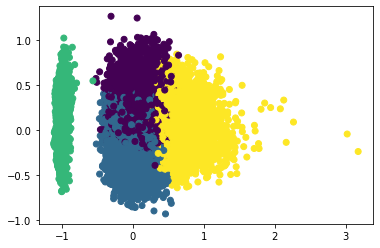

In [9]:
plt.scatter(x=df_features['pca_x'], y=df_features['pca_y'], c=df_features['cluster'])

plt.show()

In [10]:
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score

def visualize_silhouette(cluster_lists, X_features): 
    """
    여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 
    시각화한 함수 작성
    """
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(1, n_cols, figsize=(4*n_cols, 4))
    
    for ind, n_cluster in enumerate(cluster_lists):
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx()형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, 
                                   ith_cluster_sil_values, facecolor=color, 
                                   edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

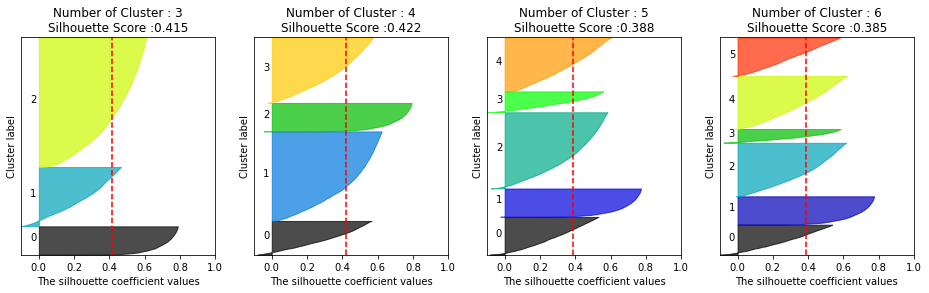

In [11]:
from sklearn.datasets import make_blobs

visualize_silhouette([3, 4, 5, 6], df_features[['pca_x', 'pca_y']])